   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

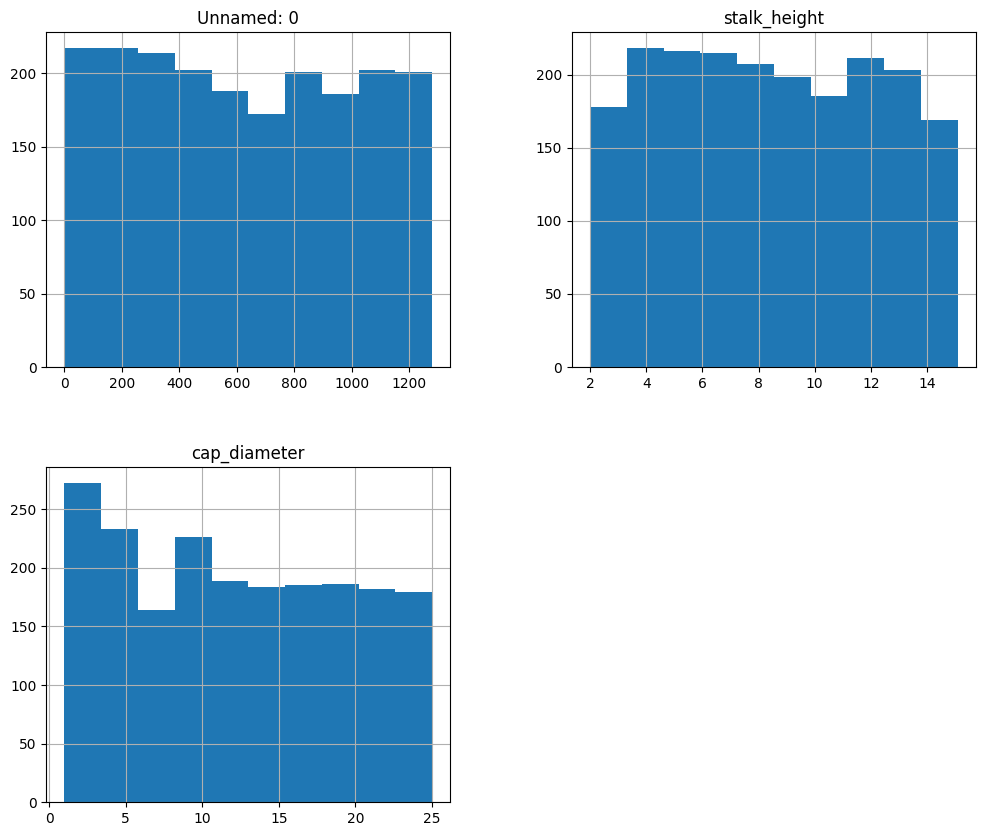

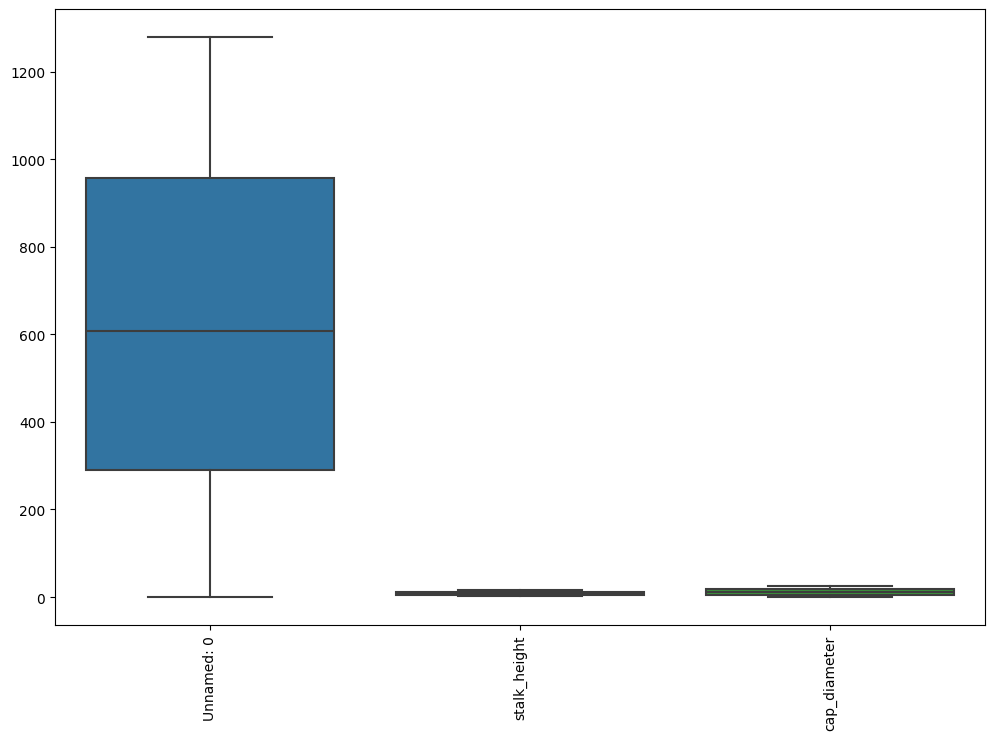

ValueError: could not convert string to float: 'sunken'

<Figure size 1000x800 with 0 Axes>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

# Task 1: Exploratory Data Analysis (EDA)

# Load the Mushroom dataset
df = pd.read_csv(r'C:\Users\hp\AppData\Local\Temp\0a7c92c0-6bc9-495c-9cf6-24f22c6ab436_SVM.zip.436\SVM\mushroom.csv')  # Replace with your dataset path
print(df.head())

# Check basic info about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Use histograms to understand feature distributions
df.hist(figsize=(12, 10))
plt.show()

# Use box plots for feature distributions
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Investigate feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Task 2: Data Preprocessing

# Encode categorical variables if necessary
# Here, let's assume the dataset contains categorical variables, so we use Label Encoding for classification.
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Split the dataset into features (X) and target (y)
X = df_encoded.drop('class', axis=1)  # Assume 'class' is the target variable
y = df_encoded['class']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Data Visualization

# Scatter plots for feature distribution (using PCA to reduce dimensionality to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title('PCA of Mushroom Dataset')
plt.show()

# Visualize class distributions
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

# Task 4: SVM Implementation

# Implement SVM classifier using a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate model performance on the testing data
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Task 5: Visualization of SVM Results

# Visualizing classification results on the testing data
X_test_pca = pca.transform(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette='Set1', style=y_pred)
plt.title('SVM Classifier Results (Testing Data)')
plt.show()

# Task 6: Parameter Tuning and Optimization

# Experiment with different SVM kernels and parameters
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")
    svm = SVC(kernel=kernel, C=1, gamma='scale')
    svm.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print("-" * 50)

# Task 7: Comparison and Analysis

# Based on the results, discuss the performance and strengths of each kernel (linear, poly, rbf)
# Here, we'll compare the results for each kernel after running the experiments above.

# Analyze SVM's strengths and weaknesses:
# - SVM with the 'linear' kernel is likely to perform well for linearly separable data.
# - The 'poly' and 'rbf' kernels can model non-linear decision boundaries, making them suitable for more complex datasets.
# - It's crucial to adjust hyperparameters like C (regularization) and gamma (kernel coefficient) to avoid overfitting or underfitting.

# Practical Implications of SVM:
# SVMs are widely used for classification tasks in fields like bioinformatics (e.g., disease classification), finance (e.g., fraud detection), and text classification (e.g., spam detection).
# SVMs perform well on smaller datasets and high-dimensional data but can be computationally expensive for very large datasets.



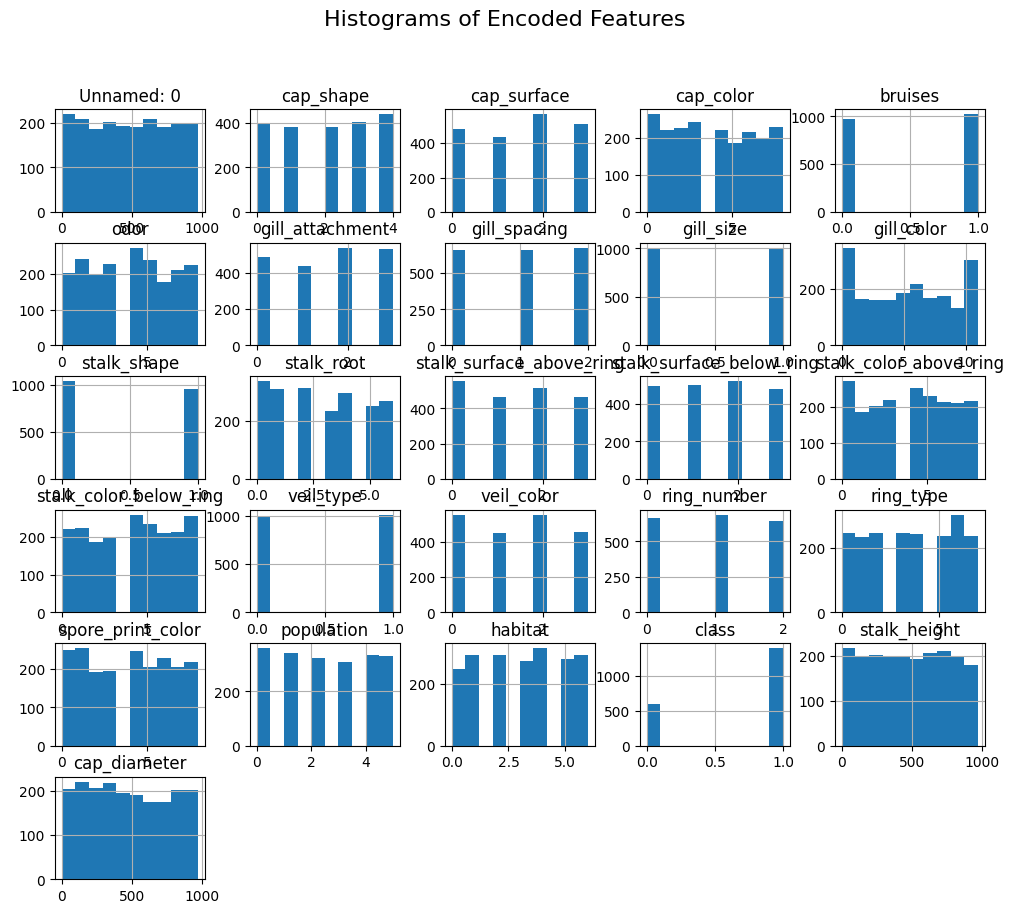

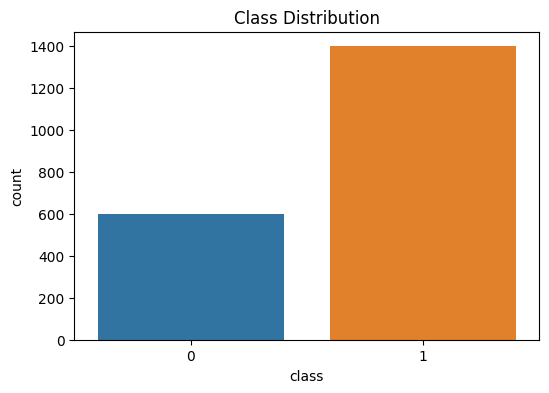

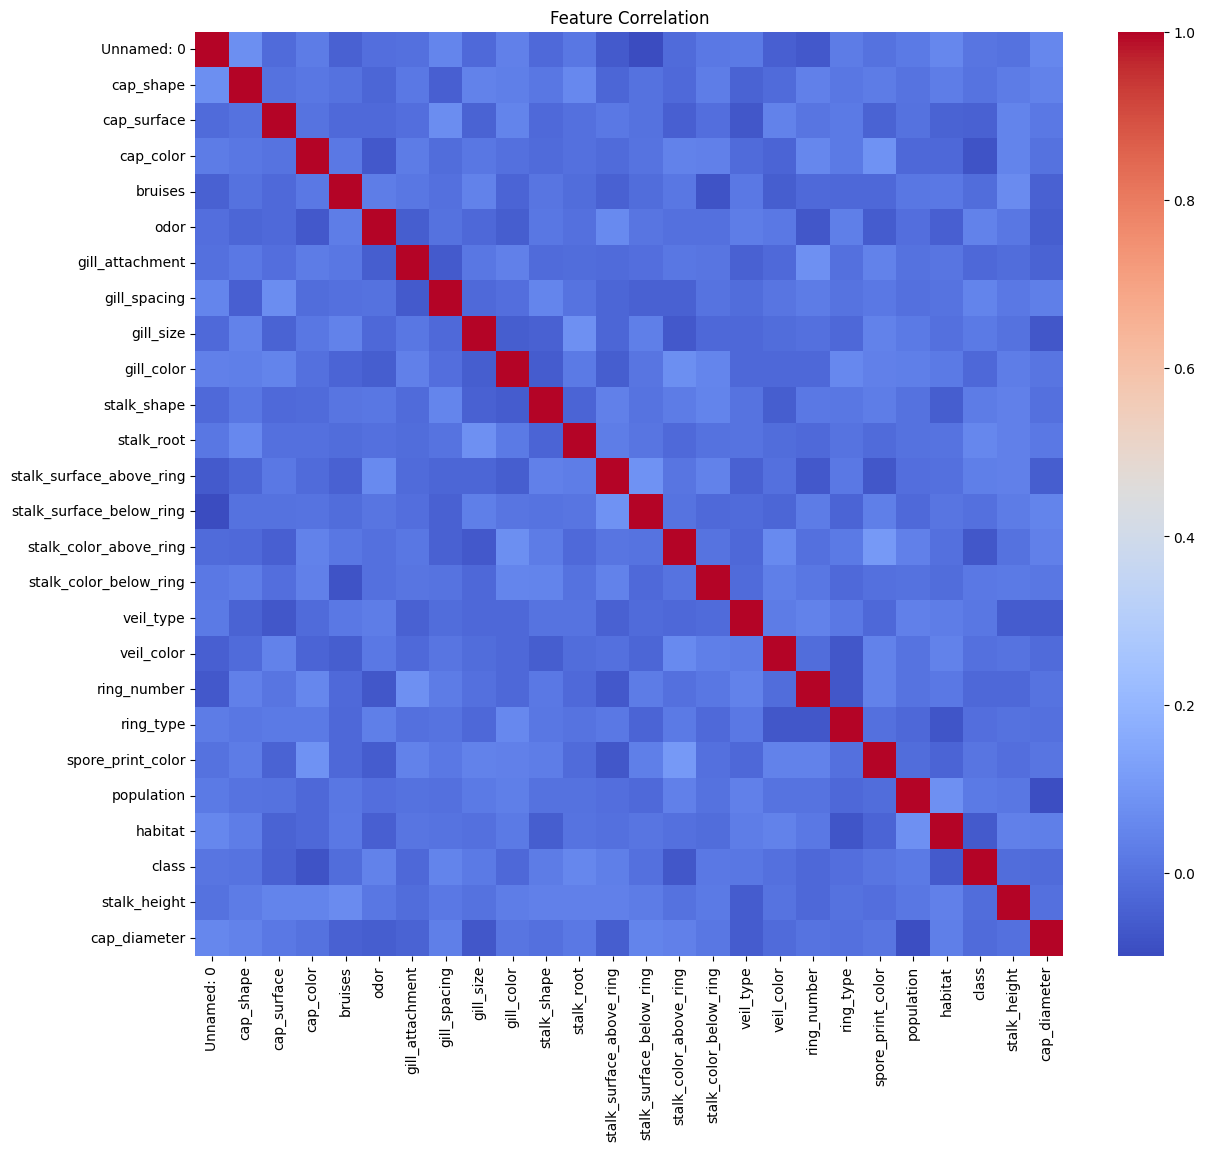

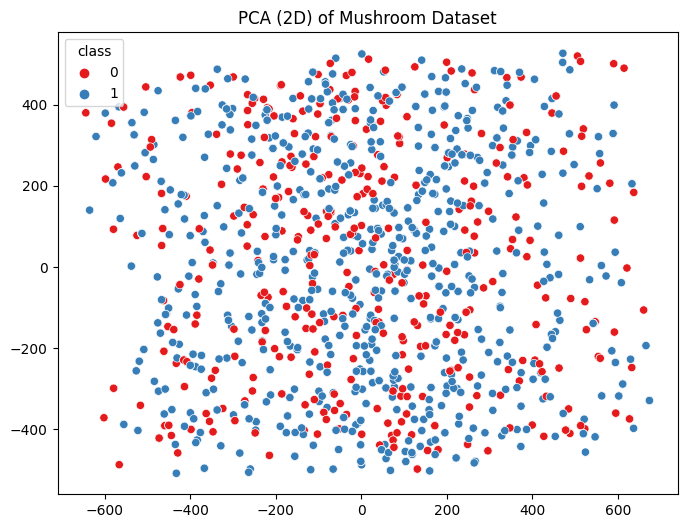

Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925


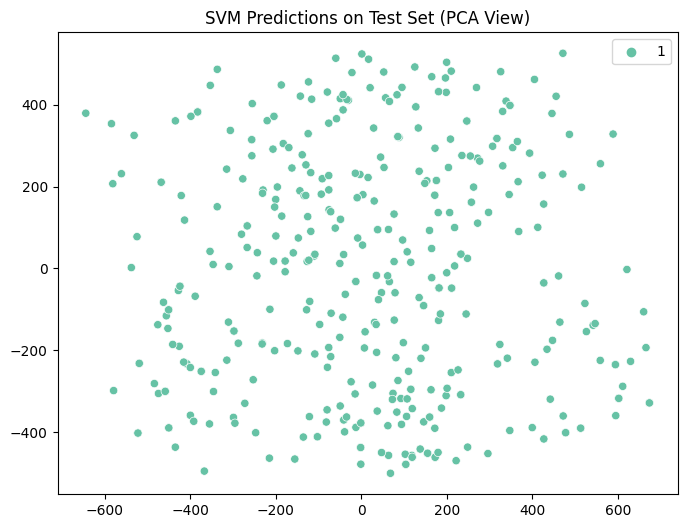


Kernel: linear
Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925

Kernel: poly
Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925

Kernel: rbf
Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv(r'C:\Users\hp\AppData\Local\Temp\0a7c92c0-6bc9-495c-9cf6-24f22c6ab436_SVM.zip.436\SVM\mushroom.csv')  # Make sure the file path is correct

# Encode all categorical columns
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# EDA - Histogram
df_encoded.hist(figsize=(12, 10))
plt.suptitle("Histograms of Encoded Features", fontsize=16)
plt.show()

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df_encoded['class'])
plt.title('Class Distribution')
plt.show()

# Feature Correlation Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation')
plt.show()

# Prepare data
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1')
plt.title('PCA (2D) of Mushroom Dataset')
plt.show()

# SVM Training
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Test Data Visualization with PCA
X_test_pca = pca.transform(X_test)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1], hue=y_pred, palette='Set2')
plt.title('SVM Predictions on Test Set (PCA View)')
plt.show()

# Trying different kernels
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nKernel: {k}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))
